In [1]:
!pip install torch

In [2]:
import torch

print(torch.cuda.is_available())

True


In [3]:
import os
from google.colab import drive

drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/Detecto tutorial')



Mounted at /content/drive


In [5]:
!ls

 images  'Pan detect.ipynb'


In [6]:
!!pip install detecto

['Collecting detecto',
 '  Downloading https://files.pythonhosted.org/packages/41/2f/5ce01e8aa1c3f9ab3c66a14309a5358f0ece27a80defa33311b1fb929f18/detecto-1.2.0-py3-none-any.whl',
 'Requirement already satisfied: pandas in /usr/local/lib/python3.6/dist-packages (from detecto) (1.1.5)',
 'Requirement already satisfied: torch in /usr/local/lib/python3.6/dist-packages (from detecto) (1.7.0+cu101)',
 'Requirement already satisfied: opencv-python in /usr/local/lib/python3.6/dist-packages (from detecto) (4.1.2.30)',
 'Requirement already satisfied: torchvision in /usr/local/lib/python3.6/dist-packages (from detecto) (0.8.1+cu101)',
 'Requirement already satisfied: matplotlib in /usr/local/lib/python3.6/dist-packages (from detecto) (3.2.2)',
 'Requirement already satisfied: python-dateutil>=2.7.3 in /usr/local/lib/python3.6/dist-packages (from pandas->detecto) (2.8.1)',
 'Requirement already satisfied: numpy>=1.15.4 in /usr/local/lib/python3.6/dist-packages (from pandas->detecto) (1.19.5)',
 '

In [8]:
from detecto import core, utils, visualize

dataset = core.Dataset('Images/')
model = core.Model(['pan'])

model.fit(dataset)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0/31 [00:00<?, ?it/s]

Epoch 1 of 10
Begin iterating over training dataset


  0%|          | 0/31 [00:00<?, ?it/s]

Epoch 2 of 10
Begin iterating over training dataset


  0%|          | 0/31 [00:00<?, ?it/s]

Epoch 3 of 10
Begin iterating over training dataset


  0%|          | 0/31 [00:00<?, ?it/s]

Epoch 4 of 10
Begin iterating over training dataset


  0%|          | 0/31 [00:00<?, ?it/s]

Epoch 5 of 10
Begin iterating over training dataset


  0%|          | 0/31 [00:00<?, ?it/s]

Epoch 6 of 10
Begin iterating over training dataset


  0%|          | 0/31 [00:00<?, ?it/s]

Epoch 7 of 10
Begin iterating over training dataset


  0%|          | 0/31 [00:00<?, ?it/s]

Epoch 8 of 10
Begin iterating over training dataset


  0%|          | 0/31 [00:00<?, ?it/s]

Epoch 9 of 10
Begin iterating over training dataset


  0%|          | 0/31 [00:00<?, ?it/s]

Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 31/31 [00:09<00:00,  3.34it/s]


In [7]:
from detecto import core, utils, visualize
dataset = core.Dataset('Images/')
model = core.Model(['pan'])

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [11]:
image = utils.read_image('Images/maxresdefault.jpg')
predictions = model.predict(image)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions


print(labels) 


print(boxes)


print(scores)

['pan', 'pan', 'pan', 'pan', 'pan']
tensor([[  35.3380,  268.2496,  509.7208,  662.6850],
        [   0.0000,  161.7955,  700.3597,  720.0000],
        [ 776.2984,   19.7855, 1280.0000,  699.8795],
        [  34.4839,  427.6254,  518.4718,  624.0291],
        [   0.0000,   29.0572, 1280.0000,  720.0000]])
tensor([0.9944, 0.8322, 0.4553, 0.1092, 0.0820])


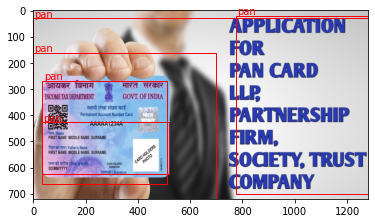

In [12]:
visualize.show_labeled_image(image, boxes, labels)

In [8]:
from torchvision import transforms

augmentations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(saturation=0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset('Images/', transform=augmentations)

loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

In [9]:

model.fit(loader)

  0%|          | 0/42 [00:00<?, ?it/s]

Epoch 1 of 10
Begin iterating over training dataset


  0%|          | 0/42 [00:00<?, ?it/s]

Epoch 2 of 10
Begin iterating over training dataset


  0%|          | 0/42 [00:00<?, ?it/s]

Epoch 3 of 10
Begin iterating over training dataset


  0%|          | 0/42 [00:00<?, ?it/s]

Epoch 4 of 10
Begin iterating over training dataset


  0%|          | 0/42 [00:00<?, ?it/s]

Epoch 5 of 10
Begin iterating over training dataset


  0%|          | 0/42 [00:00<?, ?it/s]

Epoch 6 of 10
Begin iterating over training dataset


  0%|          | 0/42 [00:00<?, ?it/s]

Epoch 7 of 10
Begin iterating over training dataset


  0%|          | 0/42 [00:00<?, ?it/s]

Epoch 8 of 10
Begin iterating over training dataset


  0%|          | 0/42 [00:00<?, ?it/s]

Epoch 9 of 10
Begin iterating over training dataset


  0%|          | 0/42 [00:00<?, ?it/s]

Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 42/42 [00:25<00:00,  1.63it/s]


In [15]:
image = utils.read_image('Images/maxresdefault.jpg')
predictions = model.predict(image)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions


print(labels) 


print(boxes)


print(scores)

['pan', 'pan', 'pan']
tensor([[  40.3681,  240.4038,  550.7795,  645.3843],
        [   0.0000,   89.2779,  928.9083,  703.9800],
        [ 695.7292,   51.5132, 1280.0000,  692.3721]])
tensor([0.9967, 0.3894, 0.0933])


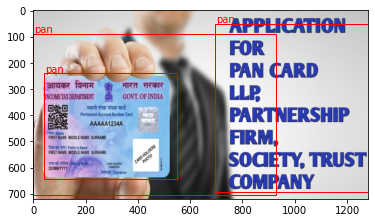

In [16]:
visualize.show_labeled_image(image, boxes, labels)

In [12]:
image = utils.read_image('Images/3.jpg')
predictions = model.predict(image)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions


print(labels) 


print(boxes)


print(scores)

['pan']
tensor([[ 794.6676,  247.5487, 1434.9778,  638.0618]])
tensor([0.9989])


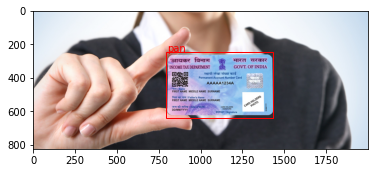

In [13]:
visualize.show_labeled_image(image, boxes, labels)